#### Import Libraries & Load Data

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from nltk.corpus import stopwords
import squarify

#from pycaret.regression import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split # Split data into train and test set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score # accuracy metric
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [263]:
drugs_test = pd.read_csv('drugsComTest_raw.tsv', sep='\t')
drugs_train = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')

In [264]:
drugs_test.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [265]:
drugs_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [266]:
# Combine train and test sets

vertical_concat = pd.concat([drugs_test, drugs_train], axis = 0)

In [267]:
vertical_concat.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [268]:
# Drop Unnamed column

vertical_concat.drop('Unnamed: 0', axis = 1, inplace = True)

#### Data Cleaning

In [269]:
# Lowercase all text in the text variables

vertical_concat['drugName'] = vertical_concat['drugName'].str.lower()
vertical_concat['condition'] = vertical_concat['condition'].str.lower()
vertical_concat['review'] = vertical_concat['review'].str.lower()

In [270]:
vertical_concat.shape

(215063, 6)

In [271]:
# Check for duplicates

for c in vertical_concat.columns:
    duplicate = vertical_concat[c].nunique()
    print("{} has {} unique value(s)".format(c, duplicate))

drugName has 3671 unique value(s)
condition has 916 unique value(s)
review has 128447 unique value(s)
rating has 10 unique value(s)
date has 3579 unique value(s)
usefulCount has 397 unique value(s)


In [272]:
# Check for missing values

for c in vertical_concat.columns:
    missing = vertical_concat[c].isnull().sum()
    if missing > 0:
        print("{} has {} missing value(s)".format(c, missing))
    else:
        print("{} has no missing value(s)".format(c,missing)) 

drugName has no missing value(s)
condition has 1194 missing value(s)
review has no missing value(s)
rating has no missing value(s)
date has no missing value(s)
usefulCount has no missing value(s)


In [273]:
# Drop rows where condition has missing values (1194 rows)

vertical_concat.dropna(subset=['condition'], inplace = True)

In [274]:
vertical_concat.shape

(213869, 6)

In [275]:
# Check to confirm rows with condition NA were dropped

for c in vertical_concat.columns:
    missing = vertical_concat[c].isnull().sum()
    if missing > 0:
        print("{} has {} missing value(s)".format(c, missing))
    else:
        print("{} has no missing value(s)".format(c,missing)) 

drugName has no missing value(s)
condition has no missing value(s)
review has no missing value(s)
rating has no missing value(s)
date has no missing value(s)
usefulCount has no missing value(s)


In [276]:
vertical_concat.head()

,drugName,condition,review,rating,date,usefulCount
0,mirtazapine,depression,"""i&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,mesalamine,"crohn's disease, maintenance","""my son has crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,bactrim,urinary tract infection,"""quick reduction of symptoms""",9.0,"September 29, 2017",3
3,contrave,weight loss,"""contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,cyclafem 1 / 35,birth control,"""i have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [277]:
vertical_concat.shape

(213869, 6)

In [278]:
# Check the data types because modeling cannot take text

vertical_concat.dtypes

drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [279]:
# Convert rating to an integer as all digits are whole number

vertical_concat['rating'] = vertical_concat['rating'].astype(int)

In [280]:
# Format to year-month-day

vertical_concat['date'] = pd.to_datetime(vertical_concat['date'])

In [281]:
vertical_concat.dtypes

drugName               object
condition              object
review                 object
rating                  int32
date           datetime64[ns]
usefulCount             int64
dtype: object

In [282]:
def cleaning(s):
    
    # Function using sub methods to clean data by finding what to replace
    # and substituting or replacing it
    
    s = str(s)
    s = s.lower()
    s = s.replace(",","")
    s = s.replace('"', "")
    s = s.replace('&#039;', '')
    s = s.replace('.', '')
    s = s.replace('</span>', '')
    return s

In [283]:
# Clean condition and review

vertical_concat['clean review'] = [cleaning(s) for s in vertical_concat['review']]
vertical_concat['clean condition'] = [cleaning(s) for s in vertical_concat['condition']]

In [284]:
print(vertical_concat['clean review'])

0         ive tried a few antidepressants over the years...
1         my son has crohns disease and has done very we...
2                               quick reduction of symptoms
3         contrave combines drugs that were used for alc...
4         i have been on this birth control for one cycl...
                                ...                        
161292    i wrote my first report in mid-october of 2014...
161293    i was given this in iv before surgey i immedia...
161294    limited improvement after 4 months developed b...
161295    ive been on thyroid medication 49 years i spen...
161296    ive had chronic constipation all my adult life...
Name: clean review, Length: 213869, dtype: object


In [285]:
# Set and preview stop words that will be removed from reviews

stop = set(stopwords.words('english'))
print(stop)

{'her', 'don', 'y', "shan't", 'them', 'who', 'than', 'through', 'until', "you're", 'myself', 'isn', 'during', 'can', 'at', 'she', 'about', 'him', 'again', 's', "mightn't", 'here', 'by', "you'll", 'himself', 'does', 'haven', 'above', 'ours', 'further', 'down', 'that', 'with', 'same', "wasn't", "shouldn't", 'up', 'there', 'me', "hasn't", 'not', 'this', 'other', 'into', 'i', 'wasn', 'my', 'a', "isn't", "doesn't", 'hers', 'under', 'will', "you've", 'o', 'in', 'your', 'he', 'shan', 'the', 'ourselves', 'which', 'shouldn', 'been', 'once', 'such', 'how', "that'll", 'so', 'of', "mustn't", "hadn't", 'all', 'why', 'am', 'doesn', 'after', 'their', 'on', 'mightn', 'each', 'yourselves', "she's", 're', "aren't", 'couldn', 'any', 'we', 'or', 'have', 've', 'mustn', 'because', "haven't", "weren't", 'an', 'some', 'but', "wouldn't", 'hasn', 'where', "you'd", 'hadn', 'more', 'before', 'over', 'few', 'below', 'from', 'only', 'most', 'has', 'are', 'you', 'they', 'did', 'and', 'too', 'theirs', 'ma', 'these', 

In [286]:
# Lowercase and split review

vertical_concat['clean review'] = vertical_concat['clean review'].str.lower().str.split()

In [287]:
# Remove stop words

vertical_concat['clean review'] = vertical_concat['clean review'].apply(lambda x: [item for item in x if item not in stop])

In [288]:
print(vertical_concat['clean review'])

0         [ive, tried, antidepressants, years, (citalopr...
1         [son, crohns, disease, done, well, asacol, com...
2                              [quick, reduction, symptoms]
3         [contrave, combines, drugs, used, alcohol, smo...
4         [birth, control, one, cycle, reading, reviews,...
                                ...                        
161292    [wrote, first, report, mid-october, 2014, alco...
161293    [given, iv, surgey, immediately, became, anxio...
161294    [limited, improvement, 4, months, developed, b...
161295    [ive, thyroid, medication, 49, years, spent, f...
161296    [ive, chronic, constipation, adult, life, trie...
Name: clean review, Length: 213869, dtype: object


#### Exploratory Data Analysis

In [289]:
# Explore condition through grouping by count

by_condition = pd.DataFrame(vertical_concat.groupby(['clean condition']).count().sort_values(by='clean condition', ascending=True)).reset_index()

In [290]:
by_condition.head()

,clean condition,drugName,condition,review,rating,date,usefulCount,clean review
0,0 users found this comment helpful,128,128,128,128,128,128,128
1,1 users found this comment helpful,114,114,114,114,114,114,114
2,10 users found this comment helpful,38,38,38,38,38,38,38
3,100 users found this comment helpful,1,1,1,1,1,1,1
4,105 users found this comment helpful,1,1,1,1,1,1,1


In [291]:
# Explore rating through grouping by review count per rating

by_rating = pd.DataFrame(vertical_concat.groupby(['rating']).count().sort_values(by='rating', ascending=False)).reset_index()

In [292]:
# Remove rows where the condition variable is listed incorrectly

by_condition = by_condition.drop(index = [0, 1, 2, 3, 4, 5, 6, 7,
                                         8, 9, 10, 11, 12, 13, 14, 
                                         15, 16, 17, 18, 19, 20, 21,
                                         22, 23, 24, 25, 26, 27, 28,
                                         29, 30, 31, 32, 33, 34, 35,
                                         36, 37, 38, 39, 40, 41, 42,
                                         43, 44, 45, 46, 47, 48, 49, 
                                         50, 51, 52, 53, 54, 55, 56,
                                         57, 58, 59, 60, 61, 62, 63, 
                                         64, 65, 66, 67, 68, 69, 70,
                                         71, 72, 73, 74, 75, 76, 77,
                                         78, 79]).reset_index()

In [293]:
by_condition.head().reset_index()

,level_0,index,clean condition,drugName,condition,review,rating,date,usefulCount,clean review
0,0,80,abdominal distension,2,2,2,2,2,2,2
1,1,81,abnormal uterine bleeding,2744,2744,2744,2744,2744,2744,2744
2,2,82,abortion,9,9,9,9,9,9,9
3,3,83,acetaminophen overdose,2,2,2,2,2,2,2
4,4,84,acial lipoatrophy,2,2,2,2,2,2,2


In [294]:
by_rating.head()

,rating,drugName,condition,review,date,usefulCount,clean review,clean condition
0,10,67682,67682,67682,67682,67682,67682,67682
1,9,36499,36499,36499,36499,36499,36499,36499
2,8,24909,24909,24909,24909,24909,24909,24909
3,7,12470,12470,12470,12470,12470,12470,12470
4,6,8403,8403,8403,8403,8403,8403,8403


In [295]:
# Clean up by_condition dataframe leaving only count

by_condition['Count'] = by_condition[['drugName']]
by_condition.drop('drugName', axis = 1, inplace = True)
by_condition.drop('condition', axis = 1, inplace = True)
by_condition.drop('review', axis = 1, inplace = True)
by_condition.drop('rating', axis = 1, inplace = True)
by_condition.drop('date', axis = 1, inplace = True)
by_condition.drop('usefulCount', axis = 1, inplace = True)
by_condition.drop('clean review', axis = 1, inplace = True)
by_condition.drop('index', axis = 1, inplace = True)

In [296]:
# Clean up by_rating dataframe leaving only count

by_rating['Count'] = by_rating[['drugName']]
by_rating.drop('condition', axis = 1, inplace = True)
by_rating.drop('review', axis = 1, inplace = True)
by_rating.drop('date', axis = 1, inplace = True)
by_rating.drop('usefulCount', axis = 1, inplace = True)
by_rating.drop('clean review', axis = 1, inplace = True)
by_rating.drop('clean condition', axis = 1, inplace = True)
by_rating.drop('drugName', axis = 1, inplace = True)

In [297]:
by_condition.head()

,clean condition,Count
0,abdominal distension,2
1,abnormal uterine bleeding,2744
2,abortion,9
3,acetaminophen overdose,2
4,acial lipoatrophy,2


In [298]:
by_rating.head()

,rating,Count
0,10,67682
1,9,36499
2,8,24909
3,7,12470
4,6,8403


In [299]:
by_condition.shape

(836, 2)

In [300]:
by_rating.shape

(10, 2)

In [301]:
by_condition['Count'].nlargest(20)

102    38436
201    12164
563     8245
58      7812
6       7435
101     5604
388     4904
826     4857
531     4757
15      4509
212     3362
243     3290
330     3104
810     3085
1       2744
110     2498
718     2440
375     2370
461     2277
59      2236
Name: Count, dtype: int64

In [302]:
# From looking at our largest counts of condition, we can keep just those to visualize

condition = by_condition[by_condition['Count']>2200].sort_values(by = 'Count')

Text(0, 0.5, 'Condition')

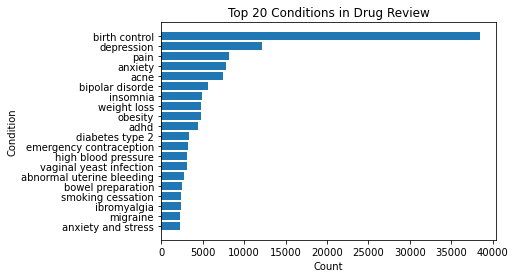

In [303]:
plt.barh(condition['clean condition'], condition['Count'])
plt.title('Top 20 Conditions in Drug Review')
plt.xlabel('Count')
plt.ylabel('Condition')

In [304]:
# Let's look at the top 6

condition_1 = by_condition[by_condition['Count']>5000].sort_values(by = 'Count')

In [305]:
condition_1.shape

(6, 2)

In [306]:
# Subset the dataframe to include only rows with the top conditions

subset = vertical_concat['condition'].isin (['birth control', 'depression', 'bipolar disorde', 'acne', 'anxiety', 'pain'])

In [307]:
# filter specific columns
cols = ['drugName', 'condition', 'review', 'rating', 'usefulCount', 'clean review', 'date']

In [308]:
df_for_model = vertical_concat.loc[subset, cols].reset_index()

In [309]:
df_for_model.head()

,index,drugName,condition,review,rating,usefulCount,clean review,date
0,0,mirtazapine,depression,"""i&#039;ve tried a few antidepressants over th...",10,22,"[ive, tried, antidepressants, years, (citalopr...",2012-02-28
1,4,cyclafem 1 / 35,birth control,"""i have been on this birth control for one cyc...",9,4,"[birth, control, one, cycle, reading, reviews,...",2015-10-22
2,6,copper,birth control,"""i&#039;ve had the copper coil for about 3 mon...",6,1,"[ive, copper, coil, 3, months, really, excited...",2016-06-06
3,9,levora,birth control,"""i was on this pill for almost two years. it d...",2,3,"[pill, almost, two, years, work, far, getting,...",2011-04-16
4,17,microgestin fe 1 / 20,acne,"""so i was on ginanvi for about 3 months before...",3,1,"[ginanvi, 3, months, switched, pill, due, high...",2017-06-22


In [310]:
df_for_model.drop('index', axis = 1, inplace = True)
df_for_model.drop('review', axis = 1, inplace = True)

In [311]:
df_for_model.head()

,drugName,condition,rating,usefulCount,clean review,date
0,mirtazapine,depression,10,22,"[ive, tried, antidepressants, years, (citalopr...",2012-02-28
1,cyclafem 1 / 35,birth control,9,4,"[birth, control, one, cycle, reading, reviews,...",2015-10-22
2,copper,birth control,6,1,"[ive, copper, coil, 3, months, really, excited...",2016-06-06
3,levora,birth control,2,3,"[pill, almost, two, years, work, far, getting,...",2011-04-16
4,microgestin fe 1 / 20,acne,3,1,"[ginanvi, 3, months, switched, pill, due, high...",2017-06-22


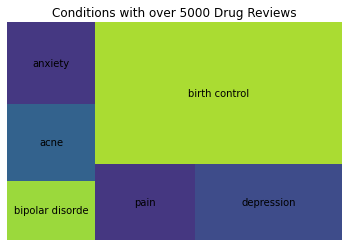

In [312]:
# Create treemap of the top six conditions that were reviewed

ax = squarify.plot(sizes = condition_1['Count'], label = condition_1['clean condition'])
plt.axis('off')
plt.title('Conditions with over 5000 Drug Reviews')
plt.show()

Text(0, 0.5, 'Count')

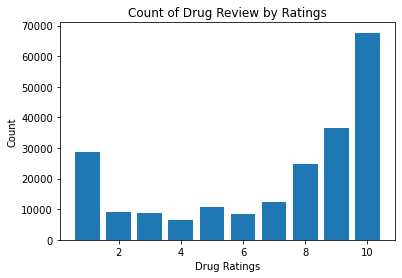

In [313]:
# A look at count of drug review by rating

plt.bar(by_rating['rating'], by_rating['Count'])
plt.title('Count of Drug Review by Ratings')
plt.xlabel('Drug Ratings')
plt.ylabel('Count')

#### Sentiment Analysis

In [314]:
# Define a function to assign 1 for positive and 0 for negative

def sentiment(n):
    return 1 if n >= 8 else 0

df_for_model['sentiment'] = df_for_model['rating'].apply(sentiment)
df_for_model.head()

,drugName,condition,rating,usefulCount,clean review,date,sentiment
0,mirtazapine,depression,10,22,"[ive, tried, antidepressants, years, (citalopr...",2012-02-28,1
1,cyclafem 1 / 35,birth control,9,4,"[birth, control, one, cycle, reading, reviews,...",2015-10-22,1
2,copper,birth control,6,1,"[ive, copper, coil, 3, months, really, excited...",2016-06-06,0
3,levora,birth control,2,3,"[pill, almost, two, years, work, far, getting,...",2011-04-16,0
4,microgestin fe 1 / 20,acne,3,1,"[ginanvi, 3, months, switched, pill, due, high...",2017-06-22,0


In [315]:
df_for_model['clean review'] = df_for_model['clean review'].astype(str)

In [316]:
df_for_model.dtypes

drugName                object
condition               object
rating                   int32
usefulCount              int64
clean review            object
date            datetime64[ns]
sentiment                int64
dtype: object

In [317]:
df_new = df_for_model[['clean review', 'sentiment']]
df_new.head()

,clean review,sentiment
0,"['ive', 'tried', 'antidepressants', 'years', '...",1
1,"['birth', 'control', 'one', 'cycle', 'reading'...",1
2,"['ive', 'copper', 'coil', '3', 'months', 'real...",0
3,"['pill', 'almost', 'two', 'years', 'work', 'fa...",0
4,"['ginanvi', '3', 'months', 'switched', 'pill',...",0


In [318]:
# Explore condition through grouping by count

by_sentiment = pd.DataFrame(df_new.groupby(['sentiment']).count()).reset_index()

In [319]:
by_sentiment.head()

,sentiment,clean review
0,0,34882
1,1,44814


In [320]:
by_sentiment['sentiment'] = by_sentiment['sentiment'].replace(to_replace=[0, 1], value=['Negative', 'Positive'])

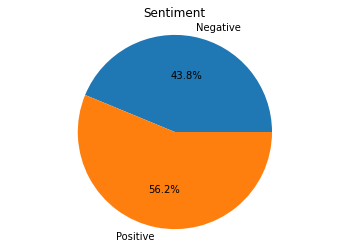

In [321]:
fig1, ax1 = plt.subplots()
plt.title('Sentiment')
ax1.pie(by_sentiment['clean review'], labels=by_sentiment['sentiment'], autopct='%1.1f%%')
ax1.axis('equal')  
plt.show()

In [322]:
# Function using CountVectorizer to preprocess, tokenize and 
# printing the top words used and returning sparse matrix as x
# and the y values which are 1 or 0 (our target variable of positive or negative)

def count_vector(dataset_y, dataset_x):
    y = dataset_y.values
    count_vectorizer = CountVectorizer(max_features = 100)
    sparse_matrix = count_vectorizer.fit_transform(dataset_x).toarray()
    X = sparse_matrix
    print('The top 100 words used: {}'.format(count_vectorizer.get_feature_names()))
    return X, y

In [323]:
x, y = count_vector(df_new['sentiment'], df_new['clean review'])

The top 100 words used: ['10', 'acne', 'ago', 'almost', 'also', 'anxiety', 'away', 'back', 'bad', 'better', 'birth', 'bleeding', 'control', 'could', 'cramps', 'day', 'days', 'depression', 'didnt', 'doctor', 'dont', 'drive', 'effects', 'even', 'ever', 'every', 'experience', 'face', 'far', 'feel', 'felt', 'first', 'gain', 'gained', 'get', 'getting', 'go', 'going', 'good', 'got', 'great', 'havent', 'im', 'ive', 'last', 'life', 'like', 'little', 'lot', 'love', 'made', 'medication', 'medicine', 'mg', 'month', 'months', 'mood', 'much', 'never', 'night', 'normal', 'nothing', 'one', 'pain', 'period', 'periods', 'pill', 'prescribed', 'put', 'quot', 'really', 'recommend', 'severe', 'sex', 'side', 'since', 'skin', 'sleep', 'spotting', 'started', 'still', 'stopped', 'swings', 'take', 'taking', 'time', 'took', 'tried', 'two', 'used', 'week', 'weeks', 'weight', 'well', 'went', 'work', 'worked', 'would', 'year', 'years']


In [324]:
y = y.reshape(-1, 1)
y.shape

(79696, 1)

In [325]:
x.shape

(79696, 100)

In [333]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [334]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
confusion_matrix(prediction, y_test)
accuracy = 100.0 * (accuracy_score(y_test, prediction))
print('Accuracy:', accuracy)

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 69.27444399134227


In [335]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.60      0.66      0.63     12601
           1       0.76      0.71      0.74     19278

    accuracy                           0.69     31879
   macro avg       0.68      0.69      0.68     31879
weighted avg       0.70      0.69      0.69     31879



In [336]:
nb_multi = MultinomialNB()
nb_multi.fit(x_train, y_train)
prediction = nb_multi.predict(x_test)
accuracy = 100.0 * (accuracy_score(y_test, prediction))
print('Accuracy:', accuracy)

Accuracy: 66.72417578970482


C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [337]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60     12744
           1       0.74      0.69      0.71     19135

    accuracy                           0.67     31879
   macro avg       0.66      0.66      0.66     31879
weighted avg       0.67      0.67      0.67     31879



In [338]:
nb_bern = BernoulliNB()
nb_bern.fit(x_train, y_train)
prediction = nb_bern.predict(x_test)
accuracy = 100.0 * (accuracy_score(y_test, prediction))
print('Accuracy:', accuracy)

Accuracy: 66.40107908027228


C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [339]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.56      0.63      0.59     12313
           1       0.75      0.69      0.71     19566

    accuracy                           0.66     31879
   macro avg       0.65      0.66      0.65     31879
weighted avg       0.67      0.66      0.67     31879

